In [1]:
import polars as pl
import seaborn as sns
from matplotlib import pyplot as plt

In [2]:
df_anage = pl.read_csv("../data/anage.csv", infer_schema_length=1000)
df_earthquakes = pl.read_csv("../data/EarthquakesChile_2000-2024.csv", try_parse_dates=True).with_columns(
    Year=pl.col("Date").dt.year(),
    Month=pl.col("Date").dt.month()
)

In [3]:
df_anage.head()

HAGRID,Kingdom,Phylum,Class,Order,Family,Genus,Species,Common name,Female maturity (days),Male maturity (days),Gestation/Incubation (days),Weaning (days),Litter/Clutch size,Litters/Clutches per year,Inter-litter/Interbirth interval,Birth weight (g),Weaning weight (g),Adult weight (g),Growth rate (1/days),Maximum longevity (yrs),Source,Specimen origin,Sample size,Data quality,IMR (per yr),MRDT (yrs),Metabolic rate (W),Body mass (g),Temperature (K),References
i64,str,str,str,str,str,str,str,str,i64,i64,i64,str,f64,f64,i64,f64,str,f64,f64,f64,str,str,str,str,f64,f64,f64,f64,f64,str
3,"""Animalia""","""Arthropoda""","""Branchiopoda""","""Diplostraca""","""Daphniidae""","""Daphnia""","""pulicaria""","""Daphnia""",null,null,null,null,null,null,null,null,null,null,null,0.19,null,"""unknown""","""medium""","""acceptable""",null,null,null,null,null,"""1294,1295,1296"""
5,"""Animalia""","""Arthropoda""","""Insecta""","""Diptera""","""Drosophilidae""","""Drosophila""","""melanogaster""","""Fruit fly""",7,7,null,null,null,null,null,null,null,null,null,0.3,null,"""captivity""","""large""","""acceptable""",0.05,0.04,null,null,null,"""2,20,32,47,53,68,69,240,241,24…"
6,"""Animalia""","""Arthropoda""","""Insecta""","""Hymenoptera""","""Apidae""","""Apis""","""mellifera""","""Honey bee""",null,null,null,null,null,null,null,null,null,null,null,8.0,"""812""","""unknown""","""medium""","""acceptable""",null,null,null,null,null,"""63,407,408,741,805,806,808,812…"
8,"""Animalia""","""Arthropoda""","""Insecta""","""Hymenoptera""","""Formicidae""","""Cardiocondyla""","""obscurior""","""Cardiocondyla obscurior""",null,null,null,null,null,null,null,null,null,null,null,0.5,"""1293""","""captivity""","""medium""","""acceptable""",null,null,null,null,null,"""1293"""
9,"""Animalia""","""Arthropoda""","""Insecta""","""Hymenoptera""","""Formicidae""","""Lasius""","""niger""","""Black garden ant""",null,null,null,null,null,null,null,null,null,null,null,28.0,"""411""","""unknown""","""medium""","""acceptable""",null,null,null,null,null,"""411,813,814"""


In [4]:
df_earthquakes.head()

UTC_Date,Profoundity_Km,Magnitude_Ml,Date,Hour,Location,Region,Latitude,Longitude,Year,Month
datetime[μs],f64,f64,date,time,str,str,f64,f64,i32,i8
2024-03-01 16:35:22,243.0,2.9,2024-03-01,13:35:22,"""45 km al SE de Socaire""","""Antofagasta""",-23.958,-67.698,2024,3
2024-03-01 15:41:03,259.0,3.6,2024-03-01,12:41:03,"""57 km al E de Socaire""","""Antofagasta""",-23.8,-67.375,2024,3
2024-03-01 08:27:13,26.0,2.9,2024-03-01,05:27:13,"""33 km al S de Huasco""","""Atacama""",-28.755,-71.288,2024,3
2024-03-01 08:22:21,54.0,3.7,2024-03-01,05:22:21,"""49 km al SO de Huasco""","""Atacama""",-28.822,-71.52,2024,3
2024-03-01 07:12:58,20.0,2.9,2024-03-01,04:12:58,"""16 km al SE de Los Vilos""","""Coquimbo""",-31.991,-71.376,2024,3


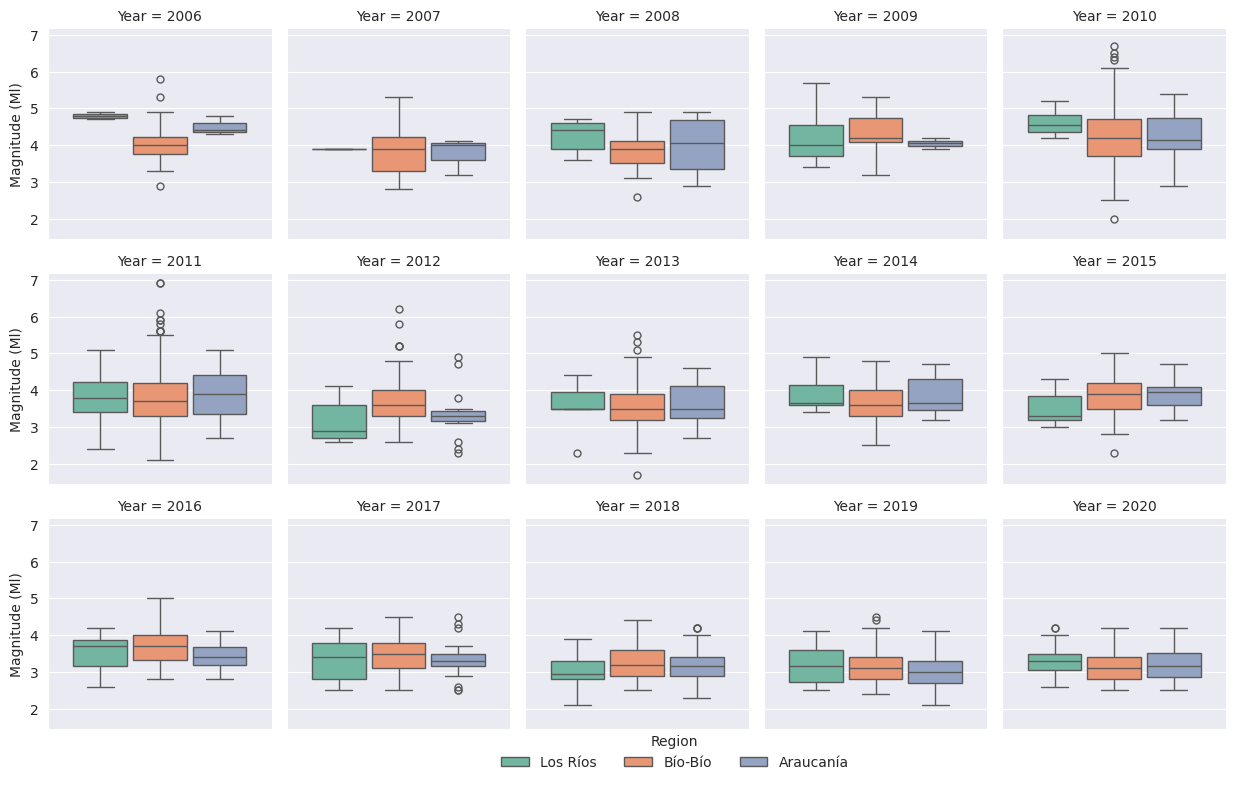

In [5]:
with sns.axes_style("darkgrid"):
    g = sns.catplot(
        df_earthquakes.filter(
            pl.col("Year").is_between(2006, 2020),
            pl.col("Region").is_in(["Bío-Bío", "Araucanía", "Los Ríos"])
        ),
        kind="box",
        y="Magnitude_Ml",
        hue="Region",
        col="Year",
        col_wrap=5,
        height=2.5,
        aspect=1,
        gap=0.1,
        palette="Set2",
        sharey=True
    )
    g.set_ylabels("Magnitude (Ml)")
    sns.move_legend(g, "lower center", bbox_to_anchor=(0.5, -0.05), ncol=3)

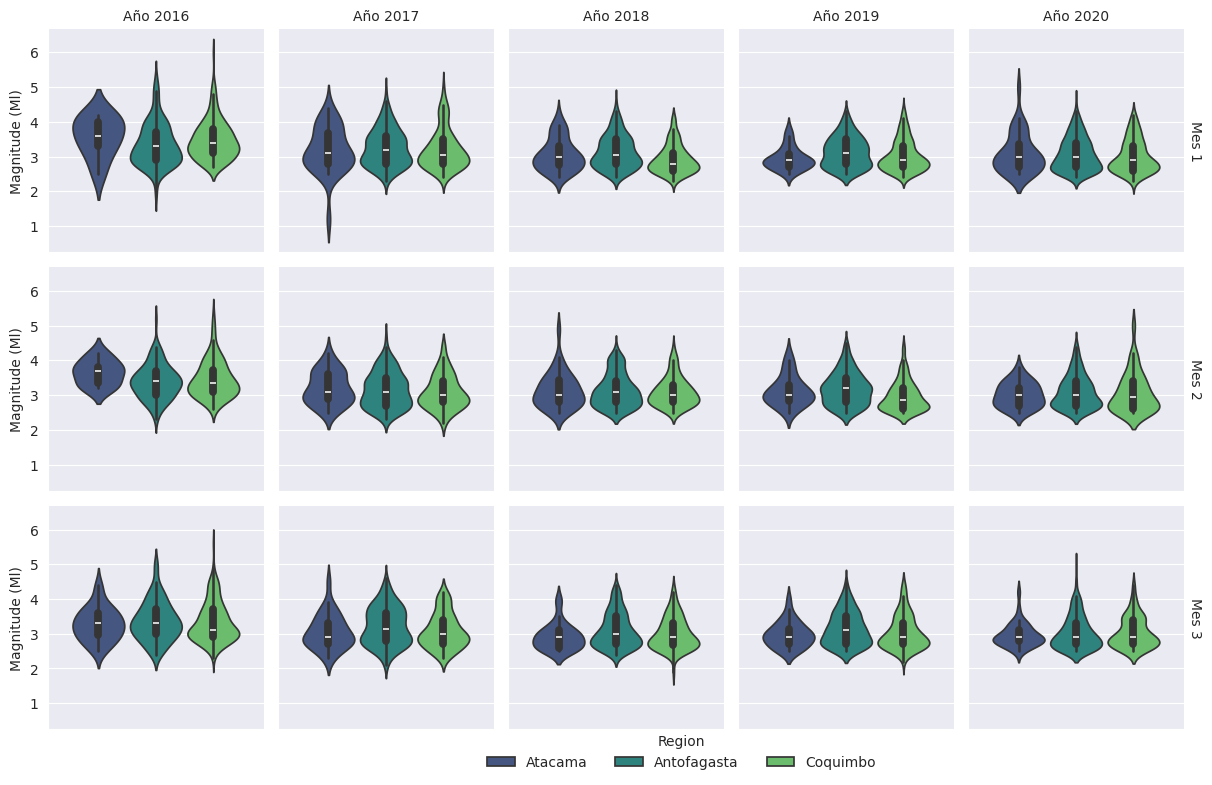

In [6]:
with sns.axes_style("darkgrid"):
    g = sns.catplot(
        df_earthquakes.filter(
            pl.col("Year").is_between(2016, 2020),
            pl.col("Month") <= 3,
            pl.col("Region").is_in(["Atacama", "Coquimbo", "Antofagasta"])
        ),
        kind="violin",
        y="Magnitude_Ml",
        hue="Region",
        col="Year",
        row="Month",
        height=2.5,
        aspect=1,
        gap=0.1,
        palette="viridis",
        sharey=True,
        sharex=True,
        margin_titles=True,
    )
    g.set_ylabels("Magnitude (Ml)")
    g.set_titles(col_template="Año {col_name}", row_template="Mes {row_name}")
    sns.move_legend(g, "lower center", bbox_to_anchor=(0.5, -0.05), ncol=3)

Text(0.5, 1.02, 'Sismos de Chile en 2010')

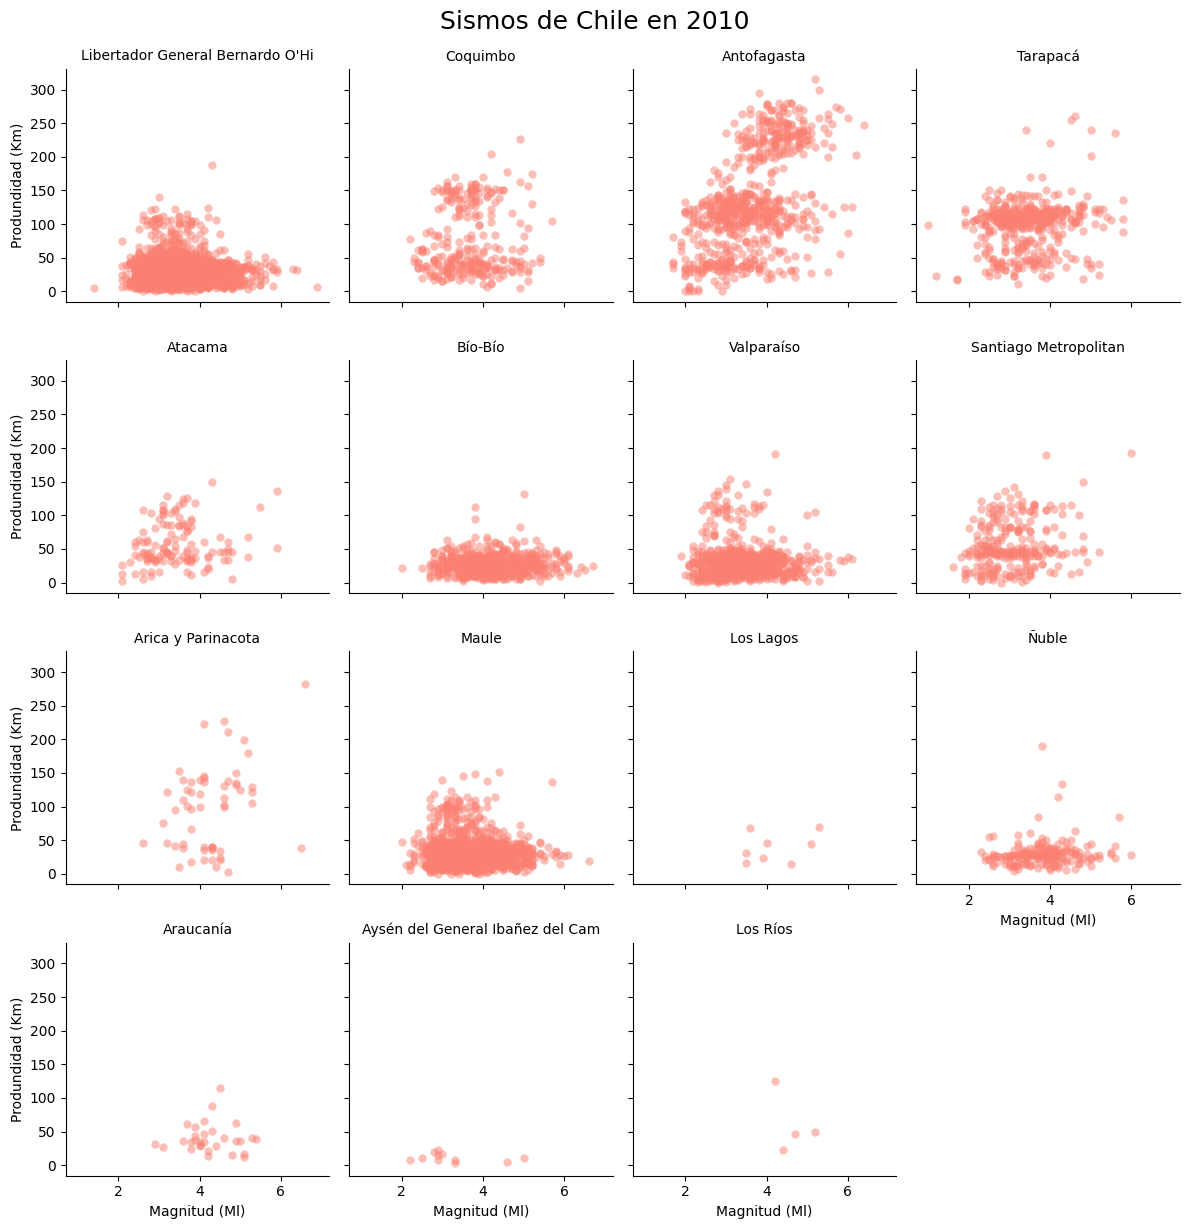

In [7]:
g = sns.relplot(
    data=df_earthquakes.filter(Year=2010),
    x="Magnitude_Ml",
    y="Profoundity_Km",
    col="Region",
    col_wrap=4,
    height=3,
    alpha=0.5,
    linewidth=0,
    color="salmon"
)
g.set_ylabels("Produndidad (Km)")
g.set_xlabels("Magnitud (Ml)")
g.set_titles(col_template="{col_name}")

g.figure.suptitle("Sismos de Chile en 2010", y=1.02, fontsize=18)

Text(0.5, 1.02, 'Sismos de Chile en 2010')

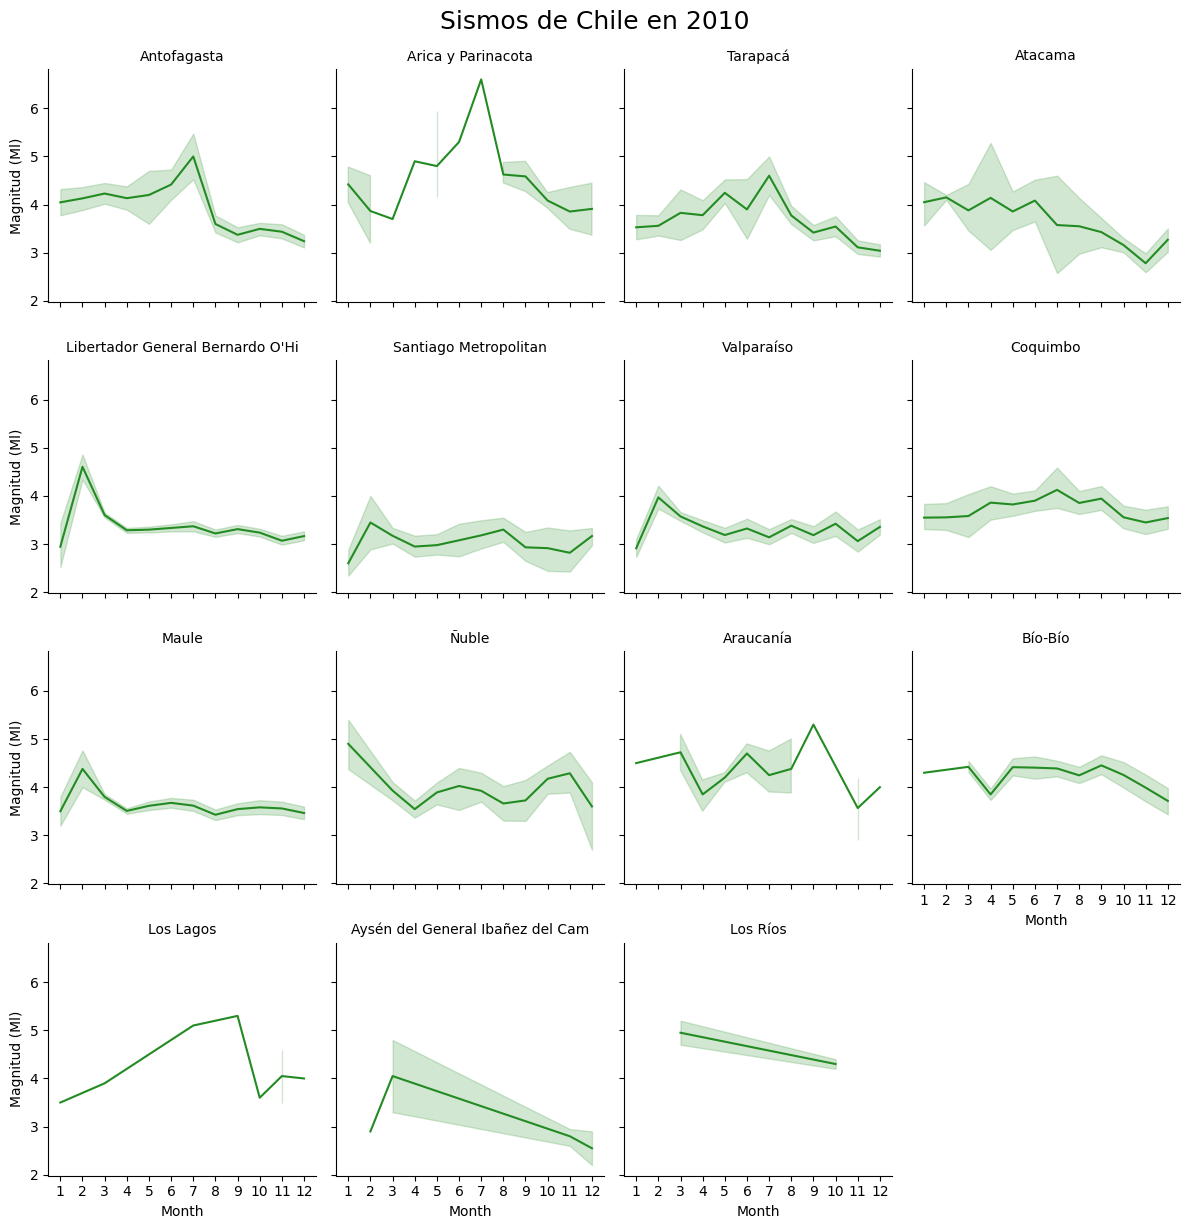

In [8]:
g = sns.relplot(
    data=df_earthquakes.filter(Year=2010).sort("Month").with_columns(
        pl.col("Month").cast(pl.String)
    ),
    kind="line",
    y="Magnitude_Ml",
    x="Month",
    col="Region",
    col_wrap=4,
    height=3,
    aspect=1,
    color="ForestGreen"
)
g.set_ylabels("Magnitud (Ml)")
g.set_titles(col_template="{col_name}")
# g.set_xticklabels()

g.figure.suptitle("Sismos de Chile en 2010", y=1.02, fontsize=18)

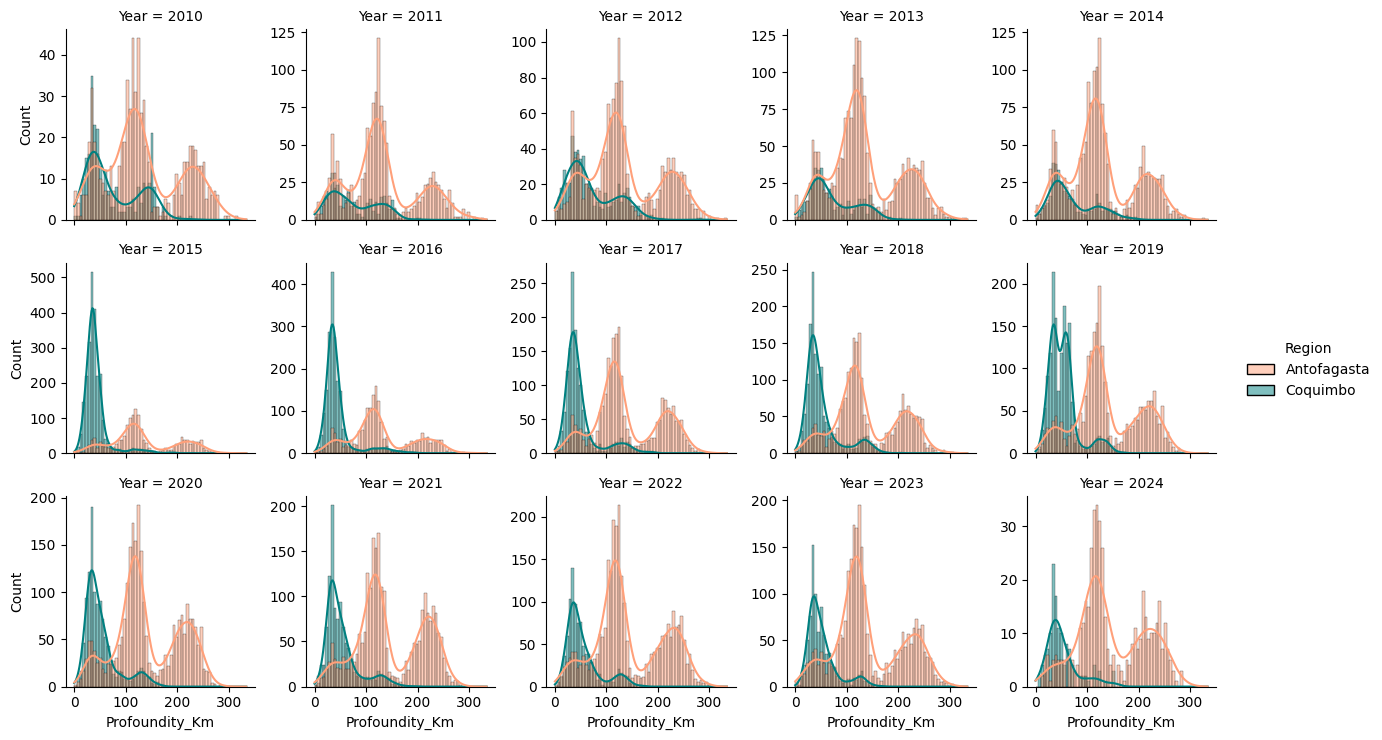

In [9]:
sns.displot(
    data=df_earthquakes.filter(
        pl.col("Year").is_between(2010, 2024),
        pl.col("Region").is_in(["Antofagasta", "Coquimbo"]),
    ),
    kind="hist",
    x="Profoundity_Km",
    hue="Region",
    col="Year",
    col_wrap=5,
    height=2.5,
    kde=True,
    palette=["lightsalmon", "teal"],
    facet_kws=dict(sharey=False),
)

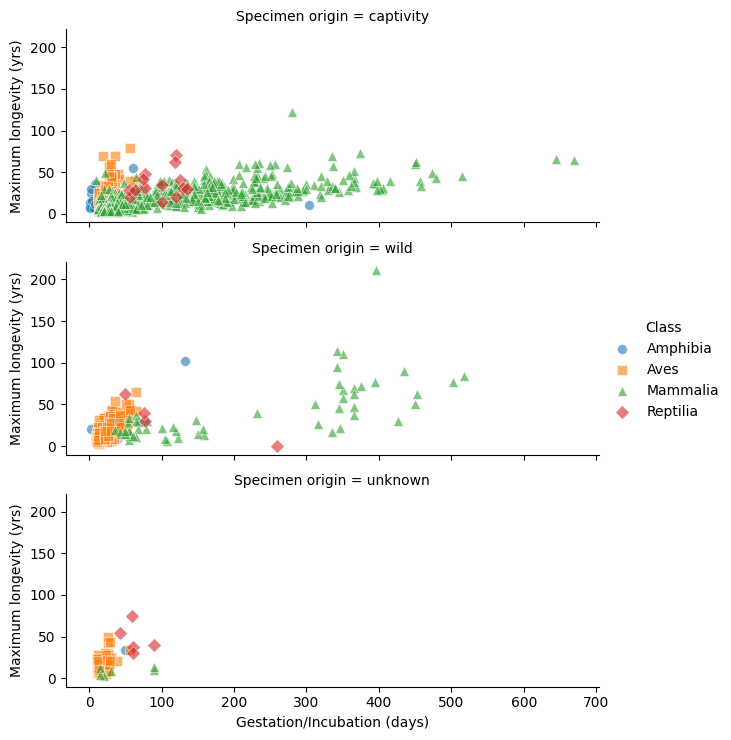

In [10]:
g = sns.FacetGrid(
    data=df_anage.filter(
        pl.col("Class").is_in(["Mammalia", "Aves", "Reptilia", "Amphibia"])
    ),
    row="Specimen origin",
    hue="Class",
    hue_kws=dict(marker=["o", "s", "^", "D"]),
    height=2.5,
    aspect=2.5,
)
g.map(
    sns.scatterplot,
    "Gestation/Incubation (days)",
    "Maximum longevity (yrs)",
    alpha=0.6,
    s=50,
)
g.add_legend()

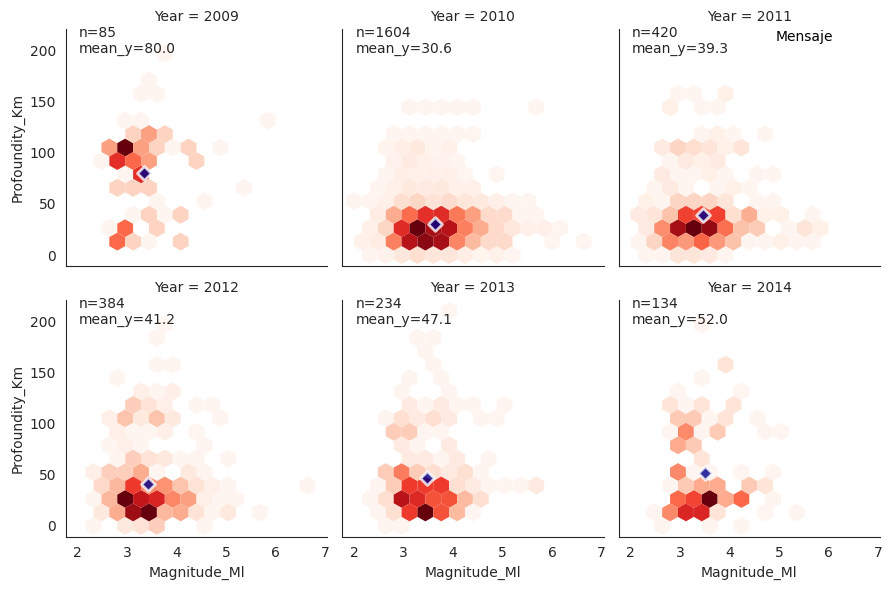

In [11]:
df_subset = df_earthquakes.with_columns(Year=pl.col("Date").dt.year()).filter(
    pl.col("Region") == "Maule",
    pl.col("Year").is_between(2009, 2014),
)

# Definir la extensión común para todos los subplots (xmin, xmax, ymin, ymax)
extent = (
    df_subset["Magnitude_Ml"].min(),
    df_subset["Magnitude_Ml"].max(),
    df_subset["Profoundity_Km"].min(),
    df_subset["Profoundity_Km"].max(),
)


def hexbix_custom(x, y, **kwargs):
    hb = plt.hexbin(
        x,
        y,
        gridsize=15,
        cmap="Reds",
        linewidths=0,
        mincnt=1,
        extent=extent,
        **kwargs,
    )

    mean_y = y.mean()
    mean_x = x.mean()

    plt.scatter(
        mean_x,
        mean_y,
        s=50,
        c="darkblue",
        marker="D",
        edgecolors="white",
        linewidths=2,
        alpha=0.8,
    )

    plt.text(
        0.05,
        0.9,
        f"n={len(x)}\nmean_y={mean_y:.1f}",
        transform=plt.gca().transAxes,
    )

    return hb


with sns.axes_style("white"):
    g = sns.FacetGrid(
        data=df_subset,
        col="Year",
        col_wrap=3,
    )
    g.map(hexbix_custom, "Magnitude_Ml", "Profoundity_Km")

for year, ax in zip(g.col_names, g.axes):
    if year == 2011:
        ax.text(
            0.6,
            0.95,
            "Mensaje",
            transform=ax.transAxes,
        )

In [12]:
df_anage_mammalia = df_anage.filter(
    pl.col("Class") == "Mammalia",
    pl.col("Order").is_in(["Primates", "Carnivora", "Artiodactyla"]),
).select(
    "Common name",
    "Order",
    "Maximum longevity (yrs)",
    "Growth rate (1/days)",
    "Birth weight (g)",
    "Adult weight (g)",
)
df_anage_mammalia.head()

Common name,Order,Maximum longevity (yrs),Growth rate (1/days),Birth weight (g),Adult weight (g)
str,str,f64,f64,f64,f64
"""Pronghorn""","""Artiodactyla""",15.5,0.0083,3000.0,46100.0
"""Addax""","""Artiodactyla""",28.0,null,5600.0,92500.0
"""Impala""","""Artiodactyla""",25.6,0.0043,5550.0,52500.0
"""Hartebeest""","""Artiodactyla""",22.5,null,9050.0,159000.0
"""Dibatag""","""Artiodactyla""",null,null,null,30500.0


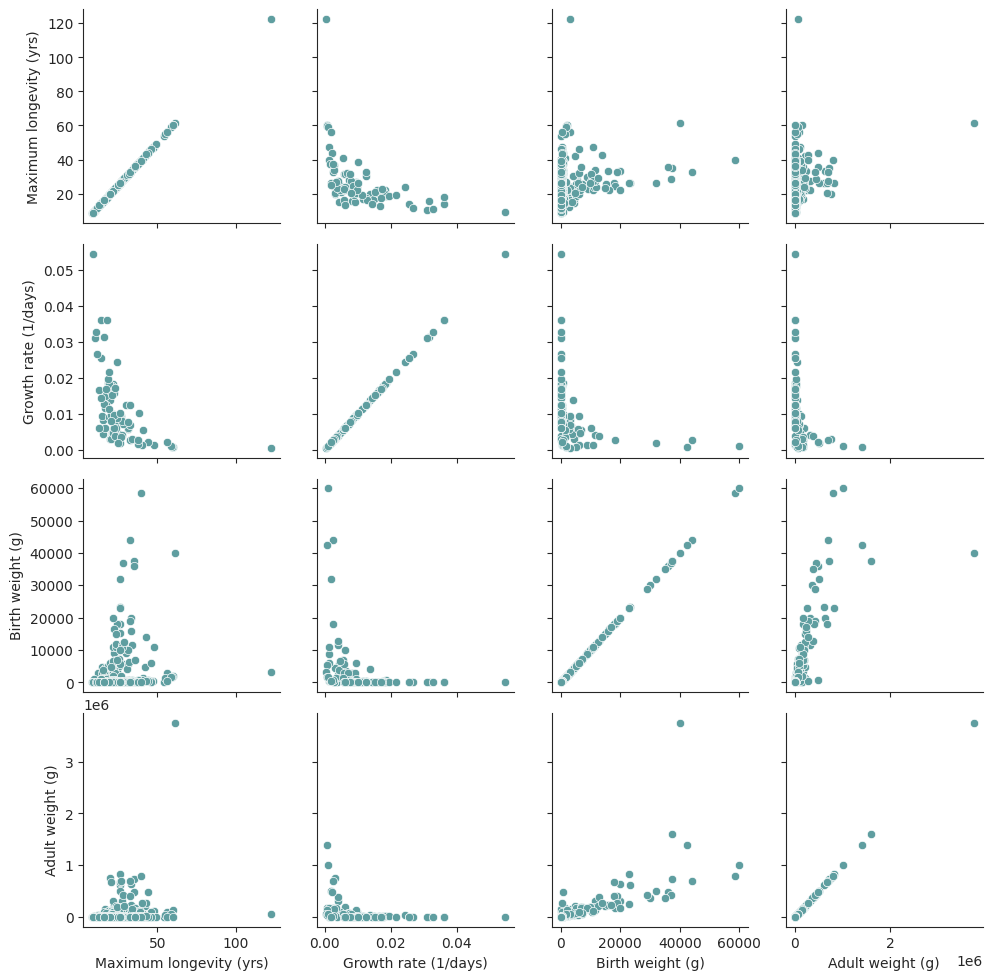

In [13]:
with sns.axes_style("ticks"):
    g = sns.PairGrid(df_anage_mammalia)
    g.map(sns.scatterplot, color="cadetblue")

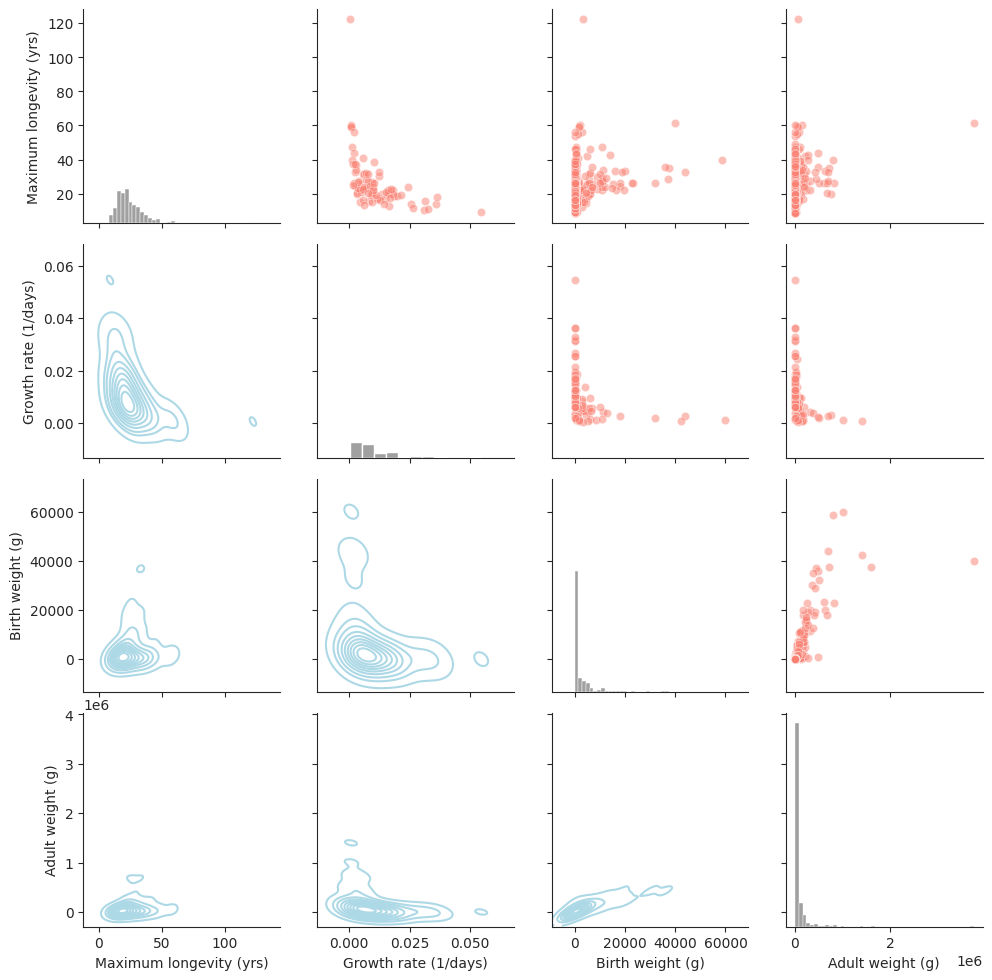

In [14]:
with sns.axes_style("ticks"):
    g = sns.PairGrid(df_anage_mammalia)
    g.map_upper(sns.scatterplot, color="salmon", alpha=0.5)
    g.map_diag(sns.histplot, color="gray")
    g.map_lower(sns.kdeplot, color="lightblue")

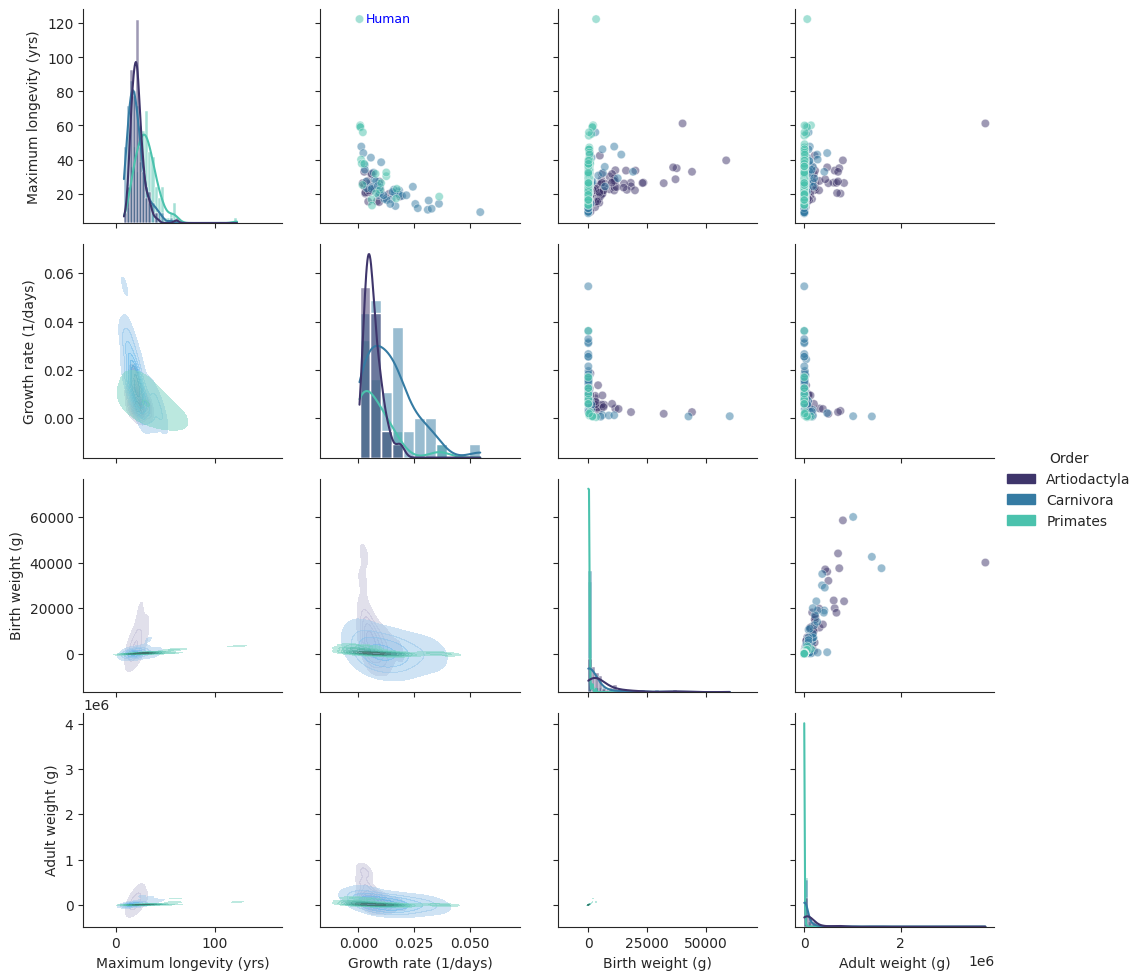

In [15]:
with sns.axes_style("ticks"):
    g = sns.PairGrid(df_anage_mammalia, hue="Order", palette="mako", diag_sharey=False)
    g.map_upper(sns.scatterplot, alpha=0.5)
    g.map_diag(sns.histplot, kde=True, alpha=0.5)
    g.map_lower(sns.kdeplot, fill=True, alpha=0.5)

    max_longevity_row = (
        df_anage_mammalia.sort(
            "Maximum longevity (yrs)", descending=True, nulls_last=True
        )
        .head(1)
        .to_dicts()[0] 
    )
    g.axes[0, 1].text(
        max_longevity_row["Growth rate (1/days)"] + 0.003,
        max_longevity_row["Maximum longevity (yrs)"],
        max_longevity_row["Common name"],
        ha="left",
        va="center",
        fontsize=9,
        color="blue",
    )

    g.add_legend()

In [16]:
df_earthquakes_maule_2010 = df_earthquakes.filter(
    Region="Maule",
    Year=2010,
)

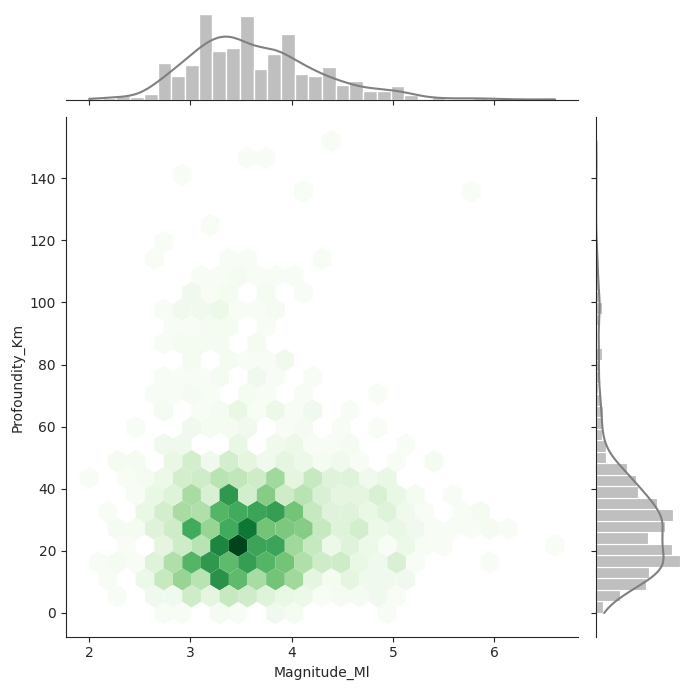

In [17]:
with sns.axes_style("ticks"):
    g = sns.JointGrid(
        data=df_earthquakes_maule_2010, x="Magnitude_Ml", y="Profoundity_Km", height=7
    )
    g.plot_joint(plt.hexbin, gridsize=25, cmap="Greens", linewidths=0, mincnt=1)
    g.plot_marginals(sns.histplot, kde=True, color="gray")

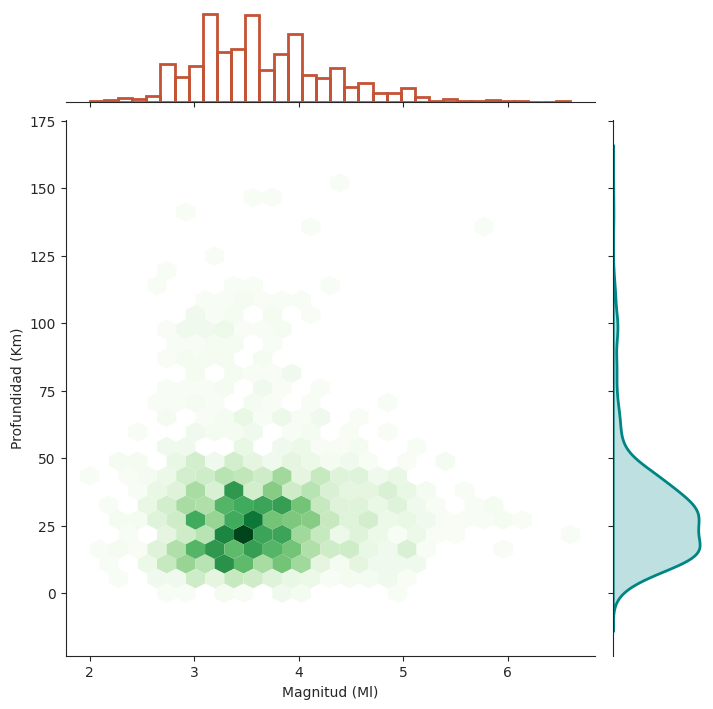

In [18]:
with sns.axes_style("ticks"):
    g = sns.JointGrid(height=7)

    x = df_earthquakes_maule_2010["Magnitude_Ml"] 
    y = df_earthquakes_maule_2010["Profoundity_Km"] 

    g.ax_joint.hexbin(
        x=x,
        y=y,
        gridsize=25,
        cmap="Greens",
        linewidths=0,
        mincnt=1,
    )
    sns.histplot(x=x, fill=False, linewidth=2, color="#c45335", ax=g.ax_marg_x)
    sns.kdeplot(y=y, linewidth=2, color="#008585", fill=True, ax=g.ax_marg_y)

    g.set_axis_labels("Magnitud (Ml)", "Profundidad (Km)")